# Univariate imputation on numerical data

# USiNG PANDAS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('titanic_toy.csv')

In [6]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [8]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [9]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [12]:
X_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [13]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [14]:
X_train['age_mean']= X_train['Age'].fillna(mean_age)
X_train['age_median']= X_train['Age'].fillna(median_age)

X_train['fare_mean']= X_train['Fare'].fillna(mean_fare)
X_train['fare_median']= X_train['Fare'].fillna(median_fare)

In [15]:
X_train

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
331,45.5,28.5000,0,45.500000,45.5,28.500000,28.5000
733,23.0,13.0000,0,23.000000,23.0,13.000000,13.0000
382,32.0,7.9250,0,32.000000,32.0,7.925000,7.9250
704,26.0,7.8542,1,26.000000,26.0,7.854200,7.8542
813,6.0,31.2750,6,6.000000,6.0,31.275000,31.2750
...,...,...,...,...,...,...,...
106,21.0,7.6500,0,21.000000,21.0,7.650000,7.6500
270,NaN,31.0000,0,29.498846,28.0,31.000000,31.0000
860,41.0,NaN,2,41.000000,41.0,32.517788,14.4000
435,14.0,120.0000,3,14.000000,14.0,120.000000,120.0000


In [17]:
# whenever we apply mean/median imputation, variance decreases/shrinks because we are adding more values around the mean/median but the change in variance should not be very significant
print('Original Age variable Variance: ',X_train['Age'].var())
print('Age variable Variance after Mean Imputation: ',X_train['age_mean'].var())
print('Age variable Variance after Median Imputation: ',X_train['age_median'].var())

print('Original Fare variable Variance: ',X_train['Fare'].var())
print('Fare variable Variance after Mean Imputation: ',X_train['fare_mean'].var())
print('Fare variable Variance after Median Imputation: ',X_train['fare_median'].var())


Original Age variable Variance:  210.2517072477435
Age variable Variance after Mean Imputation:  168.85193366872227
Age variable Variance after Median Imputation:  169.20731007048155
Original Fare variable Variance:  2761.0314349486343
Fare variable Variance after Mean Imputation:  2621.232374951235
Fare variable Variance after Median Imputation:  2637.012481677765


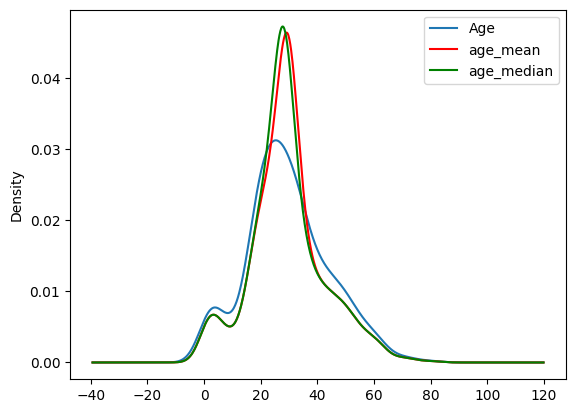

In [18]:
fig = plt.figure()

ax = fig.add_subplot(111)

#original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

#mean imputed variable distribution
X_train['age_mean'].plot(kind='kde', ax=ax, color='red')

#median imputed variable distribution
X_train['age_median'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')



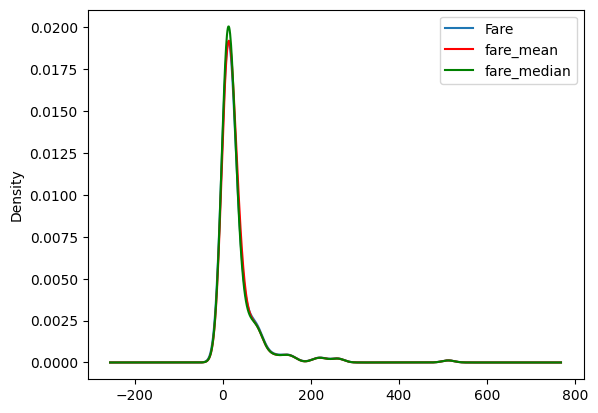

In [19]:
fig = plt.figure()

ax = fig.add_subplot(111)

#original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

#mean imputed variable distribution
X_train['fare_mean'].plot(kind='kde', ax=ax, color='red')

#median imputed variable distribution
X_train['fare_median'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')



In [20]:
X_train.cov()

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
fare_mean,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
fare_median,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


In [22]:
X_train.corr()

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
age_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
age_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
fare_mean,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
fare_median,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000


<Axes: >

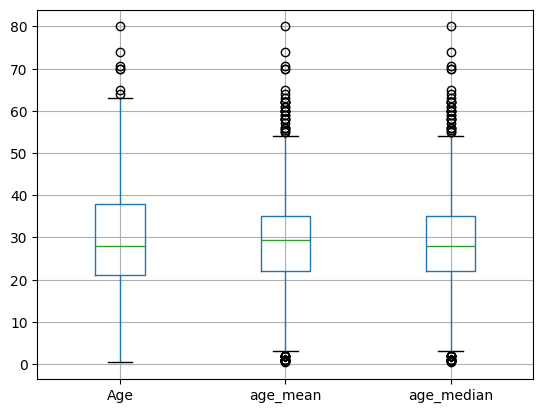

In [24]:
X_train[['Age','age_mean','age_median']].boxplot()

# Using SKLEARN

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [27]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [28]:
trf.fit(X_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [29]:
trf.named_transformers_['imputer1'].statistics_

array([29.49884615])

In [30]:
trf.named_transformers_['imputer2'].statistics_

array([14.4])

In [31]:
X_train_trf = trf.transform(X_train)
X_test_trf = trf.transform(X_test)

In [32]:
X_train

,Age,Fare,Family
331,45.5,28.5000,0
733,23.0,13.0000,0
382,32.0,7.9250,0
704,26.0,7.8542,1
813,6.0,31.2750,6
...,...,...,...
106,21.0,7.6500,0
270,NaN,31.0000,0
860,41.0,NaN,2
435,14.0,120.0000,3
